### Project Name: Comparison of C++ and Python imager
- **Start Date: 13/10/2022**
- **End Date: $\color{red}{\text{25/10/2022}}$**

**Description:**
- Comparing C++ and python imager images, step by step using:
    - 1) Visual image comparsions in python
    - 2) Image, maximum and minimum differences
    - 3) ds9 comparisons (not documented here)
- Image dimensions: (180, 180)
- Steps compared:
    - 1) Calculation of u,v and w coordinates 
    - 2) uv_grid counter 
    - 3) uv_grid_real and uv_grid_imag (gridded visibilities)
    - 4) dirty_image_real

### Importing libraries

In [1]:
# In order to save to .fits file for comparsion 
import astropy.io.fits as pyfits

# Importing fits library for viewing the images 
from astropy.io import fits

# For plotting
import matplotlib.pyplot as plt

# For plotting 3D plots
from mpl_toolkits.mplot3d import Axes3D

# Using Pandas
import pandas as pd

# In order to use numpy
import numpy as np

# For performing math calculations 
import math
from math import sin as sin
from math import cos as cos
from math import pi as pi 
from math import sqrt as sqrt 

# To check the system details 
import sys

# To check the version of astropy 
import astropy.version

# In order to calculate the processing times 
import time

### Printing versions: 

In [2]:
print('Versions Running on:')
print(f'\tPython\t\t{sys.version[:31]})')
print(f'\tAstropy\t\t{astropy.__version__}')
print(f'\tMatplotlib\t{plt.matplotlib.__version__}')

Versions Running on:
	Python		3.7.3 (default, Apr 24 2019, 15)
	Astropy		3.2.1
	Matplotlib	3.1.0


In [3]:
# Defining start time
start = time.process_time()

### Reading in C++ imager output data

In [4]:
# Reading the .fits files:
u = fits.open("u.fits")
v = fits.open("v.fits")
w = fits.open("w.fits")

uv_grid_counter = fits.open("uv_grid_counter_180x180.fits")
uv_grid_real = fits.open("uv_grid_real_180x180.fits")
uv_grid_imag = fits.open("uv_grid_imag_180x180.fits")
dirty_image_real = fits.open("dirty_image_20221018T094254446_real.fits")
dirty_image_imag = fits.open("dirty_image_20221018T094254447_imag.fits")

# Saving .fits files into images:
u_image = u[0].data 
v_image = v[0].data 
w_image = w[0].data

uv_grid_counter_image = uv_grid_counter[0].data
uv_grid_real_image = uv_grid_real[0].data
uv_grid_imag_image = uv_grid_imag[0].data
dirty_image_real_image = dirty_image_real[0].data
dirty_image_imag_image = dirty_image_imag[0].data

### Reading in Python imager output data 

In [5]:
# Reading the .fits files:
u_python = fits.open("u_python.fits")
v_python = fits.open("v_python.fits")
w_python = fits.open("w_python.fits")

uv_grid_counter_python = fits.open("uv_grid_counter_python.fits")
uv_grid_real_python = fits.open("uv_grid_real_python.fits")
uv_grid_imag_python = fits.open("uv_grid_imag_python.fits")
dirty_image_real_python = fits.open("dirty_image_real_python.fits")
dirty_image_imag_python = fits.open("dirty_image_imag_python.fits")
dirty_image_python = fits.open("dirty_image_python.fits")

# Saving .fits files into images:
u_python_image = u_python[0].data 
v_python_image = v_python[0].data 
w_python_image = w_python[0].data

uv_grid_counter_python_image = uv_grid_counter_python[0].data
uv_grid_real_python_image = uv_grid_real_python[0].data
uv_grid_imag_python_image = uv_grid_imag_python[0].data
dirty_image_real_python_image = dirty_image_real_python[0].data
dirty_image_imag_python_image = dirty_image_imag_python[0].data
dirty_image_python_image = dirty_image_python[0].data

### C++ vs Python imager: Images on Jupyter Notebook 

### u, v and w coordinates

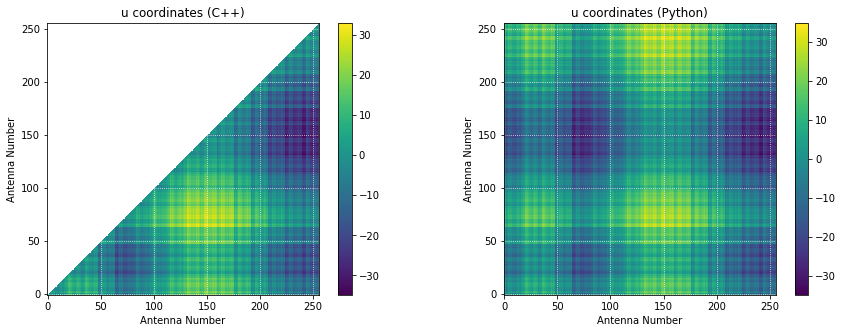

In [6]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(u_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Antenna Number")
plt.ylabel("Antenna Number")
plt.title("u coordinates (C++)")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.imshow(u_python_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Antenna Number")
plt.ylabel("Antenna Number")
plt.title("u coordinates (Python)")
plt.colorbar()

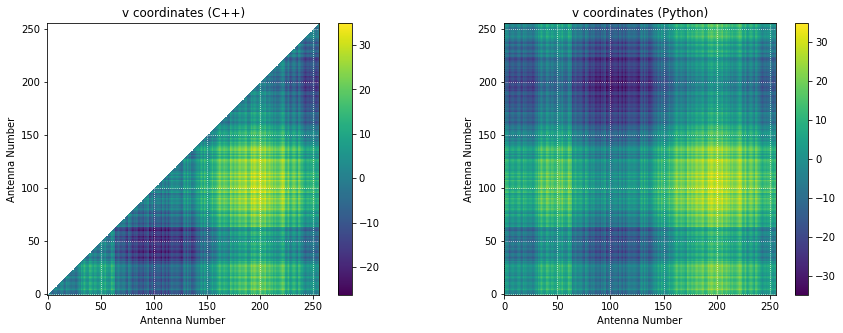

In [7]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(v_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Antenna Number")
plt.ylabel("Antenna Number")
plt.title("v coordinates (C++)")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.imshow(v_python_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Antenna Number")
plt.ylabel("Antenna Number")
plt.title("v coordinates (Python)")
plt.colorbar()

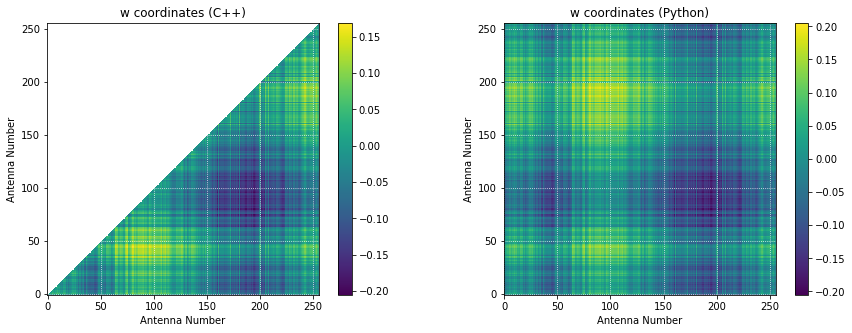

In [8]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(w_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Antenna Number")
plt.ylabel("Antenna Number")
plt.title("w coordinates (C++)")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.imshow(w_python_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Antenna Number")
plt.ylabel("Antenna Number")
plt.title("w coordinates (Python)")
plt.colorbar()

In [9]:
# Creating a dataframes for all the u,v,w values for C++ and Python imager 
df_u = pd.DataFrame(u_image)
df_v = pd.DataFrame(v_image)
df_w = pd.DataFrame(w_image)
df_u_python = pd.DataFrame(u_python_image)
df_v_python = pd.DataFrame(v_python_image)
df_w_python = pd.DataFrame(w_python_image)

In [10]:
# Inspecting the elements of u coordinates (C++ imager)
df_u

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,NaN,6.727,-0.367,1.106,6.800,4.577,5.514,4.665,2.137,2.173,...,-4.203,-5.070,-7.659,-8.616,-8.269,-6.223,-3.699,-7.322,-7.464,-6.171
1,NaN,NaN,-7.094,-5.621,0.073,-2.150,-1.213,-2.062,-4.590,-4.554,...,-10.930,-11.797,-14.386,-15.343,-14.996,-12.950,-10.426,-14.049,-14.191,-12.898
2,NaN,NaN,NaN,1.473,7.167,4.944,5.881,5.032,2.504,2.540,...,-3.836,-4.703,-7.292,-8.249,-7.902,-5.856,-3.332,-6.955,-7.097,-5.804
3,NaN,NaN,NaN,NaN,5.694,3.471,4.408,3.559,1.031,1.067,...,-5.309,-6.176,-8.765,-9.722,-9.375,-7.329,-4.805,-8.428,-8.570,-7.277
4,NaN,NaN,NaN,NaN,NaN,-2.223,-1.286,-2.135,-4.663,-4.627,...,-11.003,-11.870,-14.459,-15.416,-15.069,-13.023,-10.499,-14.122,-14.264,-12.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.524,-1.099,-1.241,0.052
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.623,-3.765,-2.472
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142,1.151
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293


In [11]:
# Inspecting the elements of u coordinates (Python imager)
df_u_python

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000,6.727,-0.367,1.106,6.800,4.577,5.514,4.665,2.137,2.173,...,-4.203,-5.070,-7.659,-8.616,-8.269,-6.223,-3.699,-7.322,-7.464,-6.171
1,-6.727,0.000,-7.094,-5.621,0.073,-2.150,-1.213,-2.062,-4.590,-4.554,...,-10.930,-11.797,-14.386,-15.343,-14.996,-12.950,-10.426,-14.049,-14.191,-12.898
2,0.367,7.094,0.000,1.473,7.167,4.944,5.881,5.032,2.504,2.540,...,-3.836,-4.703,-7.292,-8.249,-7.902,-5.856,-3.332,-6.955,-7.097,-5.804
3,-1.106,5.621,-1.473,0.000,5.694,3.471,4.408,3.559,1.031,1.067,...,-5.309,-6.176,-8.765,-9.722,-9.375,-7.329,-4.805,-8.428,-8.570,-7.277
4,-6.800,-0.073,-7.167,-5.694,0.000,-2.223,-1.286,-2.135,-4.663,-4.627,...,-11.003,-11.870,-14.459,-15.416,-15.069,-13.023,-10.499,-14.122,-14.264,-12.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,6.223,12.950,5.856,7.329,13.023,10.800,11.737,10.888,8.360,8.396,...,2.020,1.153,-1.436,-2.393,-2.046,0.000,2.524,-1.099,-1.241,0.052
252,3.699,10.426,3.332,4.805,10.499,8.276,9.213,8.364,5.836,5.872,...,-0.504,-1.371,-3.960,-4.917,-4.570,-2.524,0.000,-3.623,-3.765,-2.472
253,7.322,14.049,6.955,8.428,14.122,11.899,12.836,11.987,9.459,9.495,...,3.119,2.252,-0.337,-1.294,-0.947,1.099,3.623,0.000,-0.142,1.151
254,7.464,14.191,7.097,8.570,14.264,12.041,12.978,12.129,9.601,9.637,...,3.261,2.394,-0.195,-1.152,-0.805,1.241,3.765,0.142,0.000,1.293


In [12]:
# Inspecting the elements of v coordinates (C++ imager)
df_v

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,NaN,5.231,3.655,3.900,1.719,-4.027,-1.129,0.726,1.693,-0.977,...,5.754,3.951,5.618,6.812,8.551,6.820,3.035,1.733,4.140,4.878
1,NaN,NaN,-1.576,-1.331,-3.512,-9.258,-6.360,-4.505,-3.538,-6.208,...,0.523,-1.280,0.387,1.581,3.320,1.589,-2.196,-3.498,-1.091,-0.353
2,NaN,NaN,NaN,0.245,-1.936,-7.682,-4.784,-2.929,-1.962,-4.632,...,2.099,0.296,1.963,3.157,4.896,3.165,-0.620,-1.922,0.485,1.223
3,NaN,NaN,NaN,NaN,-2.181,-7.927,-5.029,-3.174,-2.207,-4.877,...,1.854,0.051,1.718,2.912,4.651,2.920,-0.865,-2.167,0.240,0.978
4,NaN,NaN,NaN,NaN,NaN,-5.746,-2.848,-0.993,-0.026,-2.696,...,4.035,2.232,3.899,5.093,6.832,5.101,1.316,0.014,2.421,3.159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.785,-5.087,-2.680,-1.942
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.302,1.105,1.843
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.407,3.145
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.738


In [13]:
# Inspecting the elements of v coordinates (Python imager)
df_v_python

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000,5.231,3.655,3.900,1.719,-4.027,-1.129,0.726,1.693,-0.977,...,5.754,3.951,5.618,6.812,8.551,6.820,3.035,1.733,4.140,4.878
1,-5.231,0.000,-1.576,-1.331,-3.512,-9.258,-6.360,-4.505,-3.538,-6.208,...,0.523,-1.280,0.387,1.581,3.320,1.589,-2.196,-3.498,-1.091,-0.353
2,-3.655,1.576,0.000,0.245,-1.936,-7.682,-4.784,-2.929,-1.962,-4.632,...,2.099,0.296,1.963,3.157,4.896,3.165,-0.620,-1.922,0.485,1.223
3,-3.900,1.331,-0.245,0.000,-2.181,-7.927,-5.029,-3.174,-2.207,-4.877,...,1.854,0.051,1.718,2.912,4.651,2.920,-0.865,-2.167,0.240,0.978
4,-1.719,3.512,1.936,2.181,0.000,-5.746,-2.848,-0.993,-0.026,-2.696,...,4.035,2.232,3.899,5.093,6.832,5.101,1.316,0.014,2.421,3.159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-6.820,-1.589,-3.165,-2.920,-5.101,-10.847,-7.949,-6.094,-5.127,-7.797,...,-1.066,-2.869,-1.202,-0.008,1.731,0.000,-3.785,-5.087,-2.680,-1.942
252,-3.035,2.196,0.620,0.865,-1.316,-7.062,-4.164,-2.309,-1.342,-4.012,...,2.719,0.916,2.583,3.777,5.516,3.785,0.000,-1.302,1.105,1.843
253,-1.733,3.498,1.922,2.167,-0.014,-5.760,-2.862,-1.007,-0.040,-2.710,...,4.021,2.218,3.885,5.079,6.818,5.087,1.302,0.000,2.407,3.145
254,-4.140,1.091,-0.485,-0.240,-2.421,-8.167,-5.269,-3.414,-2.447,-5.117,...,1.614,-0.189,1.478,2.672,4.411,2.680,-1.105,-2.407,0.000,0.738


In [14]:
# Inspecting the elements of w coordinates (C++ imager)
df_w

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,NaN,-0.042,-0.025,-0.013,-0.016,0.011,0.005,-0.014,0.003,0.022,...,-0.037,-0.029,-0.020,-0.013,-0.029,-0.039,-0.021,0.003,-0.027,-0.043
1,NaN,NaN,0.017,0.029,0.026,0.053,0.047,0.028,0.045,0.064,...,0.005,0.013,0.022,0.029,0.013,0.003,0.021,0.045,0.015,-0.001
2,NaN,NaN,NaN,0.012,0.009,0.036,0.030,0.011,0.028,0.047,...,-0.012,-0.004,0.005,0.012,-0.004,-0.014,0.004,0.028,-0.002,-0.018
3,NaN,NaN,NaN,NaN,-0.003,0.024,0.018,-0.001,0.016,0.035,...,-0.024,-0.016,-0.007,0.000,-0.016,-0.026,-0.008,0.016,-0.014,-0.030
4,NaN,NaN,NaN,NaN,NaN,0.027,0.021,0.002,0.019,0.038,...,-0.021,-0.013,-0.004,0.003,-0.013,-0.023,-0.005,0.019,-0.011,-0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.018,0.042,0.012,-0.004
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024,-0.006,-0.022
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030,-0.046
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016


In [15]:
# Inspecting the elements of w coordinates (Python imager)
df_w_python

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000,-0.042,-0.025,-0.013,-0.016,0.011,0.005,-0.014,0.003,0.022,...,-0.037,-0.029,-0.020,-0.013,-0.029,-0.039,-0.021,0.003,-0.027,-0.043
1,0.042,0.000,0.017,0.029,0.026,0.053,0.047,0.028,0.045,0.064,...,0.005,0.013,0.022,0.029,0.013,0.003,0.021,0.045,0.015,-0.001
2,0.025,-0.017,0.000,0.012,0.009,0.036,0.030,0.011,0.028,0.047,...,-0.012,-0.004,0.005,0.012,-0.004,-0.014,0.004,0.028,-0.002,-0.018
3,0.013,-0.029,-0.012,0.000,-0.003,0.024,0.018,-0.001,0.016,0.035,...,-0.024,-0.016,-0.007,0.000,-0.016,-0.026,-0.008,0.016,-0.014,-0.030
4,0.016,-0.026,-0.009,0.003,0.000,0.027,0.021,0.002,0.019,0.038,...,-0.021,-0.013,-0.004,0.003,-0.013,-0.023,-0.005,0.019,-0.011,-0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.039,-0.003,0.014,0.026,0.023,0.050,0.044,0.025,0.042,0.061,...,0.002,0.010,0.019,0.026,0.010,0.000,0.018,0.042,0.012,-0.004
252,0.021,-0.021,-0.004,0.008,0.005,0.032,0.026,0.007,0.024,0.043,...,-0.016,-0.008,0.001,0.008,-0.008,-0.018,0.000,0.024,-0.006,-0.022
253,-0.003,-0.045,-0.028,-0.016,-0.019,0.008,0.002,-0.017,0.000,0.019,...,-0.040,-0.032,-0.023,-0.016,-0.032,-0.042,-0.024,0.000,-0.030,-0.046
254,0.027,-0.015,0.002,0.014,0.011,0.038,0.032,0.013,0.030,0.049,...,-0.010,-0.002,0.007,0.014,-0.002,-0.012,0.006,0.030,0.000,-0.016


In [16]:
# Calculating the differences between the two dataframes, consisting of u,v and w coordinates 
diff_u = df_u - df_u_python
diff_v = df_v - df_v_python
diff_w = df_w - df_w_python

In [17]:
# Finding the minimum value from every row and saving it into a list
diff_u_list = list(diff_u.min(axis = 1, skipna = True))
diff_v_list = list(diff_v.min(axis = 1, skipna = True))
diff_w_list = list(diff_w.min(axis = 1, skipna = True))

In [18]:
# Calculting and printing out the min differences between the two dataframes 
print("Minimum difference between:")
print("- u coordinates:", min(diff_u_list))
print("- v coordinates:", min(diff_u_list))
print("- w coordinates:", min(diff_u_list))

Minimum difference between:
- u coordinates: -1.8920898412488896e-06
- v coordinates: -1.8920898412488896e-06
- w coordinates: -1.8920898412488896e-06


**Thus, the u,v and w coordinates calculated using the python imager are similar to those calculated from the C++ imager.**

### uv_grid_counter 

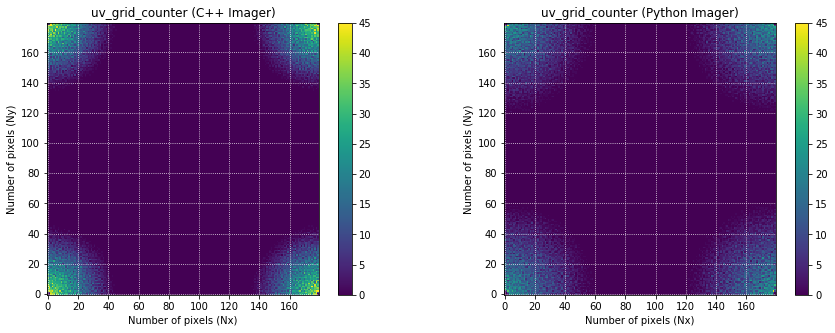

In [19]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
plt.imshow(uv_grid_counter_image, origin ='lower', vmax=45)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_counter (C++ Imager)")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.imshow(uv_grid_counter_python_image, origin ='lower', vmax =45)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_counter (Python Imager)")
plt.colorbar()

In [20]:
# Count of non zero elments in every column, python uv_grid_counter 
# np.count_nonzero(uv_grid_counter_python_image, axis=0)

In [21]:
# Count of non zero elments in every column, C++ uv_grid_counter 
# np.count_nonzero(uv_grid_counter_image, axis=0)

### uv_grid_real

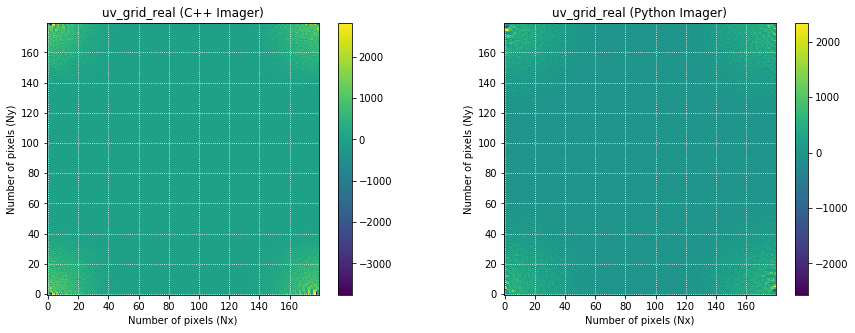

In [28]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
plt.imshow(uv_grid_real_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_real (C++ Imager)")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.imshow(uv_grid_real_python_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_real (Python Imager)")
plt.colorbar()

### uv_grid_imag: 

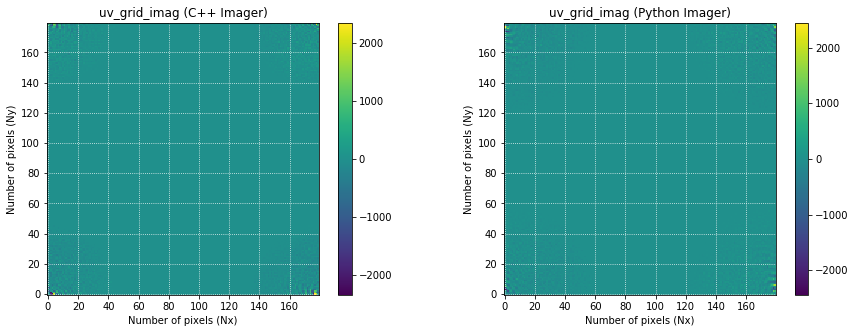

In [32]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
plt.imshow(uv_grid_imag_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_imag (C++ Imager)")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.imshow(uv_grid_imag_python_image, origin ='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("uv_grid_imag (Python Imager)")
plt.colorbar()

### dirty_image_real and dirty_image_imag

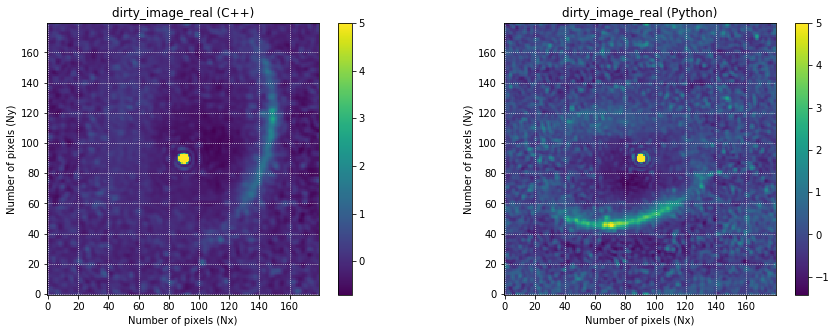

In [24]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
plt.imshow(dirty_image_real_image, origin ='lower', vmax=5)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.colorbar()
plt.title("dirty_image_real (C++)")

fig.add_subplot(rows, columns, 2)
plt.imshow(dirty_image_real_python_image, origin ='lower', vmax=5)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("dirty_image_real (Python)")
plt.colorbar()

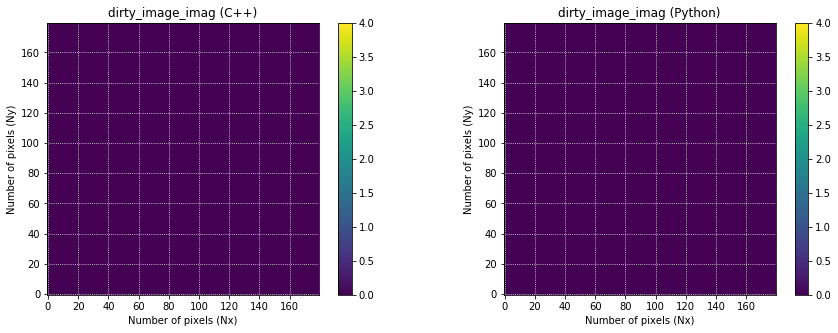

In [25]:
# create figure
fig = plt.figure(figsize=(15, 5))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot 
fig.add_subplot(rows, columns, 1)
plt.imshow(dirty_image_imag_image, origin ='lower', vmax=4)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.colorbar()
plt.title("dirty_image_imag (C++)")

fig.add_subplot(rows, columns, 2)
plt.imshow(dirty_image_imag_python_image, origin ='lower', vmax=4)
plt.grid(color='white', ls='dotted')
plt.xlabel("Number of pixels (Nx)")
plt.ylabel("Number of pixels (Ny)")
plt.title("dirty_image_imag (Python)")
plt.colorbar()

In [26]:
# diff_uv_grid_counter = uv_grid_counter_image - uv_grid_counter_python_image
# diff_dirty_image_real = dirty_image_real_image - dirty_image_python_image
# print("Maximum difference in values:")
# print("uv_grid_counter :", diff_uv_grid_counter.max())
# print("dirty_image_real :", diff_dirty_image_real.max())

In [27]:
# Overall time taken in seconds                    
print(time.process_time() - start)

3.40625
